<a href="https://colab.research.google.com/github/WoojinJeonkr/Academy-Learning/blob/main/%ED%91%B8%EB%A6%AC%EC%97%90_%EB%B3%80%ED%99%98%EA%B3%BC_%EC%8A%A4%ED%8E%99%ED%8A%B8%EB%9F%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **정현파 조합**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 1024
T = 1.0 / 44100.0
f1 = 697
f2 = 1209

In [3]:
t = np.linspace(0.0, N*T, N)

In [4]:
y1 = 1.1 * np.sin(2 * np.pi * f1 * t)
y2 = 0.9 * np.sin(2 * np.pi * f2 * t)

In [5]:
y = y1 + y2

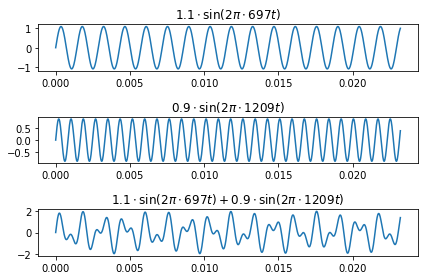

In [6]:
plt.subplot(311)
plt.plot(t, y1)
plt.title(r"$1.1\cdot\sin(2\pi\cdot 697t)$")
plt.subplot(312)
plt.plot(t, y2)
plt.title(r"$0.9\cdot\sin(2\pi\cdot 1209t)$")
plt.subplot(313)
plt.plot(t, y)
plt.title(r"$1.1\cdot\sin(2\pi\cdot 697t) + 0.9\cdot\sin(2\pi\cdot 1209t)$")
plt.tight_layout()
plt.show()

# **고속 퓨리에 변환(Fast Fourier Transform, FFT)**

In [7]:
y2 = np.hstack([y, y, y])

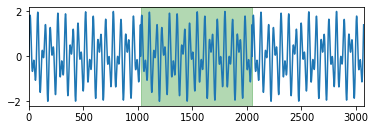

In [8]:
plt.subplot(211)
plt.plot(y2)
plt.axvspan(N, N * 2, alpha=0.3, color='green')
plt.xlim(0, 3 * N)
plt.show()

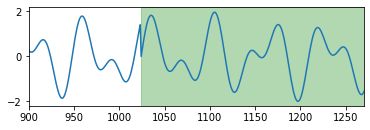

In [9]:
plt.subplot(212)
plt.plot(y2)
plt.axvspan(N, N * 2, alpha=0.3, color='green')
plt.xlim(900, 1270)
plt.show()

# **피리오도그램(periodogram) 그리기**

In [10]:
from scipy.fftpack import fft

In [11]:
yf = fft(y, N)

In [12]:
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


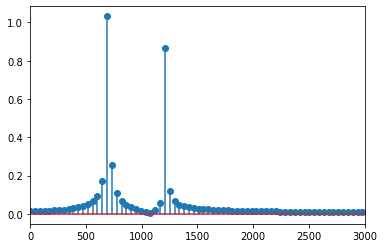

In [13]:
plt.stem(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlim(0, 3000)

plt.show()

# **DCT(Discrete Cosine Transform)**

In [14]:
from scipy.fftpack import dct

In [15]:
dct_type = 2

In [16]:
yf2 = dct(y, dct_type, N)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


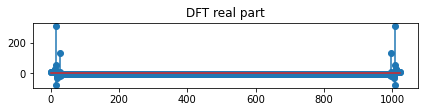

In [17]:
plt.subplot(311)
plt.stem(np.real(yf))
plt.title("DFT real part")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


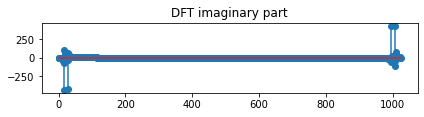

In [18]:
plt.subplot(312)
plt.stem(np.imag(yf))
plt.title("DFT imaginary part")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


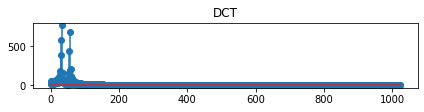

In [19]:
plt.subplot(313)
plt.stem(np.abs(yf2))
plt.title("DCT")

plt.tight_layout()
plt.show()

# **스펙트럼(power spectrum)**

In [20]:
import scipy.signal

In [21]:
f, P = scipy.signal.periodogram(y, 44100, nfft=2**12)

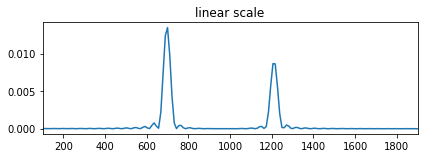

In [22]:
plt.subplot(211)
plt.plot(f, P)
plt.xlim(100, 1900)
plt.title("linear scale")

plt.tight_layout()
plt.show()

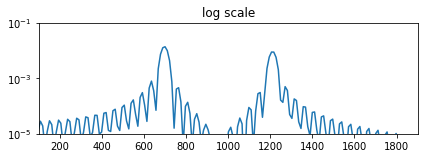

In [23]:
plt.subplot(212)
plt.semilogy(f, P)
plt.xlim(100, 1900)
plt.ylim(1e-5, 1e-1)
plt.title("log scale")

plt.tight_layout()
plt.show()

# **STFT(Short-Time Fourier Transform)**

In [24]:
import librosa
import librosa.display

In [25]:
D = np.abs(librosa.stft(y))

/usr/local/lib/python3.7/dist-packages/librosa/display.py:634: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.issubdtype(data.dtype, np.complex):


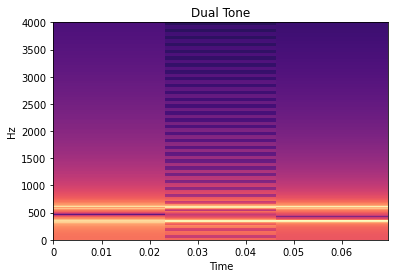

In [26]:
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time')
plt.title('Dual Tone')
plt.ylim(0, 4000)
plt.show()

In [27]:
import scipy.io.wavfile

In [28]:
sr_octave, y_octave = scipy.io.wavfile.read("octave.wav")

In [29]:
D_octave = np.abs(librosa.stft(y_octave))

/usr/local/lib/python3.7/dist-packages/librosa/display.py:634: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.issubdtype(data.dtype, np.complex):


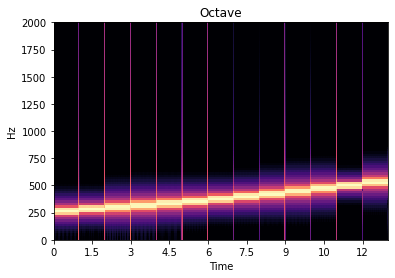

In [30]:
librosa.display.specshow(librosa.amplitude_to_db(D_octave, ref=np.max), sr=sr_octave, y_axis='linear', x_axis='time')
plt.title('Octave')
plt.ylim(0, 2000)
plt.show()

In [42]:
y, sr = librosa.load(librosa.util.example_audio_file(), offset=30, duration=5)

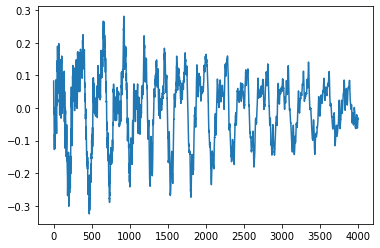

In [43]:
plt.plot(y[1000:5000])
plt.show()

In [44]:
from IPython.display import Audio, display

In [45]:
Audio(y, rate=sr)